# MAVEN MOVIES DATABASE - ANALYTICS USING SQL AND PYTHON3

#### The Database is in MySql and I'll be using MySql connector to query the Database , I'll also try to create visualizations regarding the queried data , which help in informed decision making 

In [1]:
import mysql.connector
from tabulate import tabulate
import pandas as pd
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Connecting to Database and Password has been removed for privacy purposes

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="!harshcutyi1A"
)
mycursor = mydb.cursor()

#### A small helper fucntio which takes in queries and returns a Pandas DataFrame

In [3]:
def helperfunc(query):
    mycursor.execute(query)
    myresult = mycursor.fetchall()
    df_query = pd.DataFrame(myresult)
    column_names = [i[0] for i in mycursor.description]
    df_query.columns = column_names
    return df_query

mycursor.execute("use mavenmovies;")

# 1. We will need a count of active customers for each of your stores. Separately, please. 

In [4]:
query = """
SELECT COUNT(customer_id) AS no_of_active_customer, store_id
FROM customer
WHERE active = '%d'
GROUP BY store_id
""" % (1)
df = helperfunc(query)
df

,no_of_active_customer,store_id
0,318,1
1,266,2


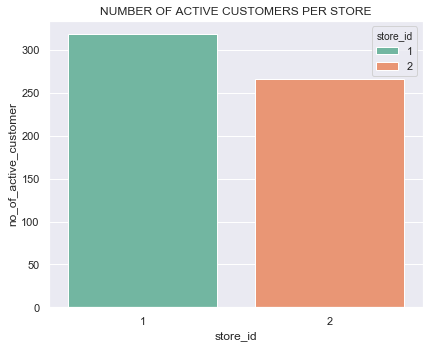

In [5]:
sns.set(rc={'figure.figsize':(6.7,5.27)})
ax = sns.barplot(x="store_id", y="no_of_active_customer",hue="store_id",dodge = False ,palette="Set2",
                 data=df).set_title('NUMBER OF ACTIVE CUSTOMERS PER STORE')

## 2. We need to find the number of Distinct Films Per Category 

In [59]:
query = """
SELECT count(DISTINCT(t1.film_id)) AS no_of_distinct_films ,t2.category_id , t2.name
FROM film_category AS t1
INNER JOIN category AS t2 ON
     t1.category_id = t2.category_id
GROUP BY t1.category_id;
"""
df = helperfunc(query)
df.head()

,no_of_distinct_films,category_id,name
0,64,1,Action
1,66,2,Animation
2,60,3,Children
3,57,4,Classics
4,58,5,Comedy


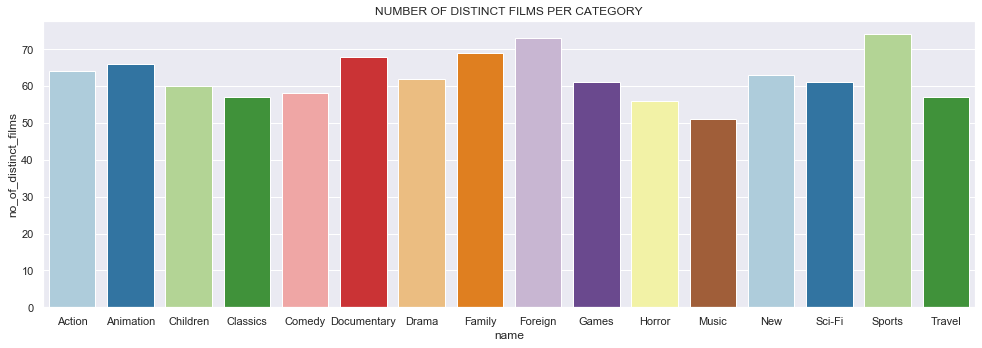

In [60]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
ax = sns.barplot(x="name", y="no_of_distinct_films" ,dodge = False,palette="Paired",
                 data=df).set_title('NUMBER OF DISTINCT FILMS PER CATEGORY')

In [8]:
sns.set(rc={'figure.figsize':(8.7,5.27)})


## 3.	We would like to understand the replacement cost of your films. Please provide the replacement cost for the film that is least expensive to replace, the most expensive to replace, and the average of all films you carry. ``

In [9]:
query = """
SELECT MIN(replacement_cost), MAX(replacement_cost) , AVG(replacement_cost)
FROM film;
"""

df = helperfunc(query)
df

,MIN(replacement_cost),MAX(replacement_cost),AVG(replacement_cost)
0,9.99,29.99,19.984000


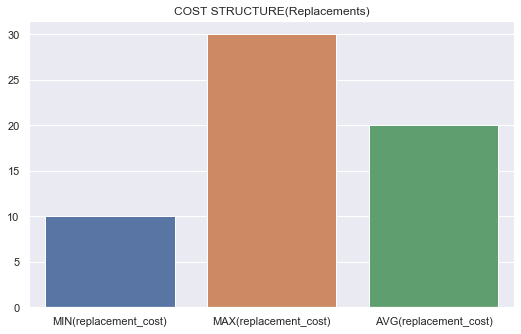

In [11]:
ax = sns.barplot(x=list(df.columns), y=list(df.iloc[0])).set_title('COST STRUCTURE(Replacements)')

## 4.	We are interested in having you put payment monitoring systems and maximum payment processing restrictions in place in order to minimize the future risk of fraud by your staff.Please provide the average payment you process, as well as the maximum payment you have processed.

In [12]:
query = """
SELECT MAX(amount) AS max_payment, AVG(amount) AS avg_payment
FROM payment;
"""
df = helperfunc(query)
df

,max_payment,avg_payment
0,11.99,4.200667


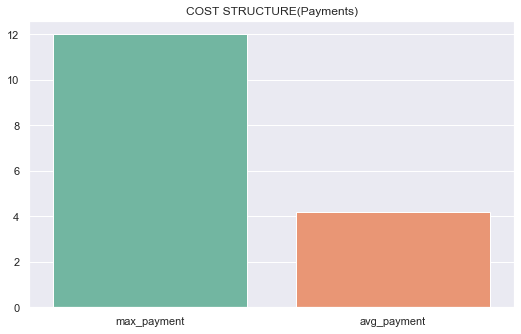

In [14]:
ax = sns.barplot(x=list(df.columns), y=list(df.iloc[0]),palette="Set2").set_title('COST STRUCTURE(Payments)')

## 5.	We would like to better understand what your customer base looks like. Please provide a list of all customer identification values, with a count of rentals they have made all-time, with your highest volume customers at the top of the list.

In [15]:
query = """
SELECT customer_id , COUNT(rental_id) AS no_of_rentals
FROM payment
group by customer_id
ORDER BY  no_of_rentals DESC
LIMIT 10;"""
df = helperfunc(query)
df


,customer_id,no_of_rentals
0,148,46
1,526,45
2,236,42
3,144,42
4,75,41
5,197,40
6,469,40
7,137,39
8,178,39
9,468,39


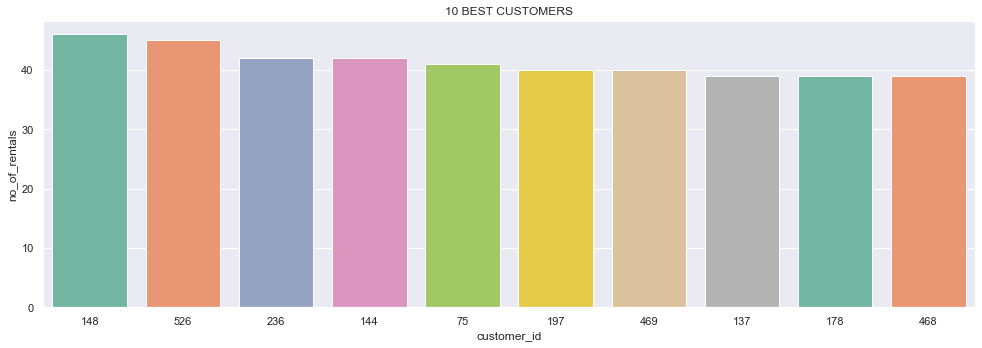

In [17]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
ax = sns.barplot(x="customer_id", y="no_of_rentals" ,dodge = False,palette="Set2",order = list(df['customer_id']),
                 data=df).set_title('10 BEST CUSTOMERS')

## 6. My partner and I want to come by each of the stores in person and meet the managers. Please send over the managers’ names at each store, with the full address of each property (street address, district, city, and country please).  

In [18]:
query = """
SELECT 
    t2.first_name, 
    t2.last_name ,
    t3.address,
    t3.district,
    t4.city,
    t5.country
FROM 
    store AS t1

INNER JOIN  
    staff AS t2 
          ON t1.store_id = t2.store_id

INNER JOIN
    address AS t3
            ON  t1.address_id = t3.address_id
        
INNER JOIN
    city as t4
        ON t3.city_id = t4.city_id

INNER JOIN
    country AS t5
        ON t4.country_id = t5.country_id;
"""
df = helperfunc(query)
df


,first_name,last_name,address,district,city,country
0,Mike,Hillyer,47 MySakila Drive,Alberta,Lethbridge,Canada
1,Jon,Stephens,28 MySQL Boulevard,QLD,Woodridge,Australia


## 7. I would like to get a better understanding of all of the inventory that would come along with the business. Please pull together a list of each inventory item you have stocked, including the store_id number, the inventory_id, the name of the film, the film’s rating, its rental rate and replacement cost. 

In [28]:
query = """
SELECT 
	t1.store_id,
    t1.inventory_id,
    t2.title,
    t2.rating,
    t2.rental_rate,
    t2.replacement_cost
FROM 
	inventory AS t1
INNER JOIN 
	film AS t2 
		ON t1.film_id = t2.film_id;
"""
df = helperfunc(query)
#displaying only 5 rows, other wise the dataframa has 5000 values

In [30]:
df.head()

,store_id,inventory_id,title,rating,rental_rate,replacement_cost
0,1,1,ACADEMY DINOSAUR,PG,0.99,20.99
1,1,2,ACADEMY DINOSAUR,PG,0.99,20.99
2,1,3,ACADEMY DINOSAUR,PG,0.99,20.99
3,1,4,ACADEMY DINOSAUR,PG,0.99,20.99
4,2,5,ACADEMY DINOSAUR,PG,0.99,20.99


## 8. From the same list of films you just pulled, please roll that data up and provide a summary level overview of your inventory. We would like to know how many inventory items you have with each rating at each store. 

In [35]:
query = """
SELECT 
	t1.store_id,
    COUNT(t1.inventory_id) AS inventory,
    t2.rating
FROM 
	inventory AS t1
INNER JOIN 
	film AS t2 
		ON t1.film_id = t2.film_id
GROUP BY store_id,t2.rating
"""

df = helperfunc(query)
df.head()


,store_id,inventory,rating
0,1,394,G
1,1,444,PG
2,1,525,PG-13
3,1,442,R
4,1,465,NC-17


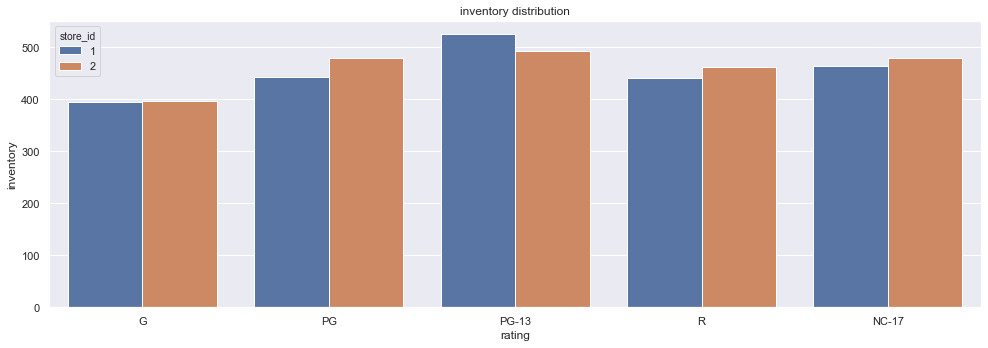

In [36]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
ax = sns.barplot(x="rating", y="inventory",hue='store_id',data=df).set_title('inventory distribution')

## 9.Similarly, we want to understand how diversified the inventory is in terms of replacement cost. We want to see how big of a hit it would be if a certain category of film became unpopular at a certain store.We would like to see the number of films, as well as the average replacement cost, and total replacement cost, sliced by store and film category. 


In [48]:
query = """
SELECT 
    t2.store_id,
    t4.name,
	AVG(t1.replacement_cost),
    SUM(t1.replacement_cost),
    COUNT(t1.film_id)
FROM 
	film AS t1
INNER JOIN 
	inventory AS t2
		ON t2.film_id = t1.film_id
INNER JOIN 
	film_category AS t3
		ON t3.film_id = t1.film_id
INNER JOIN
	category AS t4
		ON t3.category_id = t4.category_id
GROUP BY
	t2.store_id, t3.category_id;
"""
df = helperfunc(query)
df.head()

,store_id,name,AVG(t1.replacement_cost),SUM(t1.replacement_cost),COUNT(t1.film_id)
0,1,Action,21.191183,3581.31,169
1,1,Animation,20.387516,3282.39,161
2,1,Children,19.990000,2578.71,129
3,1,Classics,20.615954,2700.69,131
4,1,Comedy,19.440704,2760.58,142


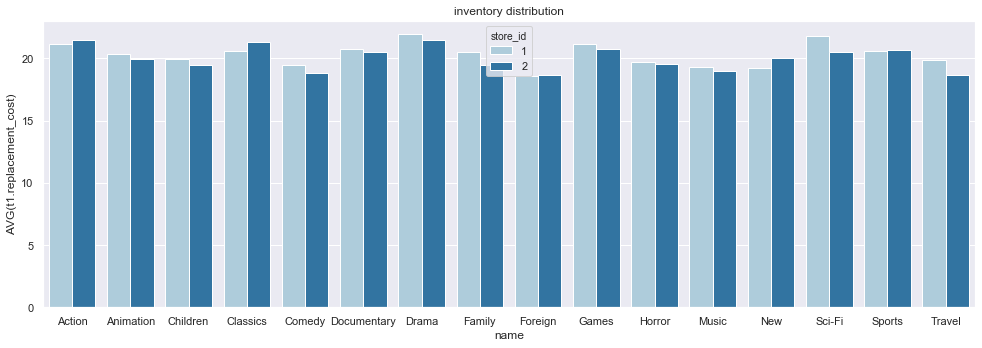

In [49]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
ax = sns.barplot(x="name", y="AVG(t1.replacement_cost)",hue='store_id',palette = "Paired",data=df).set_title('inventory distribution')

## 10.We want to make sure you folks have a good handle on who your customers are. Please provide a list of all customer names, which store they go to, whether or not they are currently active, and their full addresses – street address, city, and country. 

In [61]:
query = """
SELECT
	t1.customer_id , 
    t1.store_id ,
    t1.first_name,
    t1.last_name,
    t1.active,
    t2.address
    
FROM 
    customer AS t1
INNER JOIN 
    address AS t2
ON 
    t1.address_id = t2.address_id;
"""
df = helperfunc(query)
df.head()
len(df)

599

In [62]:
df.head()

,customer_id,store_id,first_name,last_name,active,address
0,1,1,MARY,SMITH,1,1913 Hanoi Way
1,2,1,PATRICIA,JOHNSON,1,1121 Loja Avenue
2,3,1,LINDA,WILLIAMS,1,692 Joliet Street
3,4,2,BARBARA,JONES,1,1566 Inegl Manor
4,5,1,ELIZABETH,BROWN,1,53 Idfu Parkway


## 	11.We would like to understand how much your customers are spending with you, and also to know who your most valuable customers are. Please pull together a list of customer names, their total lifetime rentals, and the sum of all payments you have collected from them. It would be great to see this ordered on total lifetime value, with the most valuable customers at the top of the list. 

In [63]:
query = """
SELECT
	t1.customer_id , 
    SUM(t2.amount) AS total_spent
    FROM customer AS t1
INNER JOIN payment AS t2
	ON t1.customer_id = t2.customer_id
GROUP BY
	customer_id
ORDER BY total_spent DESC
LIMIT 10;"""
df = helperfunc(query)
df.head()

,customer_id,total_spent
0,526,221.55
1,148,216.54
2,144,195.58
3,178,194.61
4,137,194.61


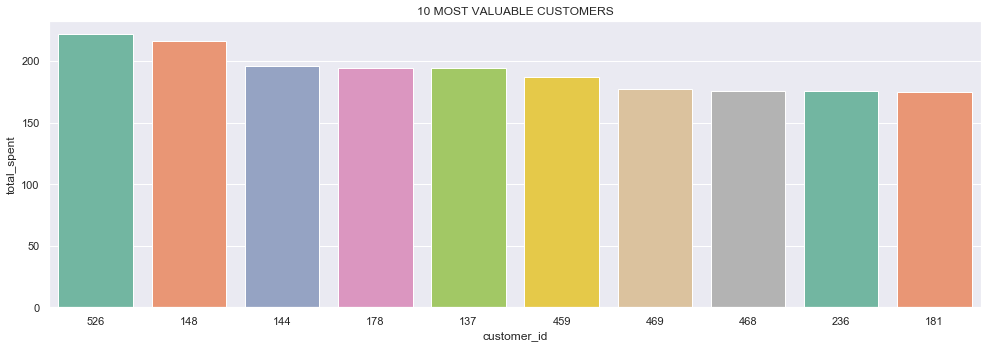

In [64]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
ax = sns.barplot(x="customer_id", y="total_spent" ,dodge = False,palette="Set2",order = list(df['customer_id']),
                 data=df).set_title('10 MOST VALUABLE CUSTOMERS')